
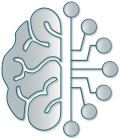

**Start at:** Thursday 18 July 2024, 14:35:53  
**Hostname:** insa-20474 (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [2]:
# This now triggers vID.init() automatically via __init__.py
import pyphyschemtools as t4pPC
from pyphyschemtools import fg, hl, bg, color
t4pPC.init()
%matplotlib inline

#cancel the "last show-up" behaviour of Jupyter notebooks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

__author__ = "Matthieu CHARNAY, LPCNO (INSA-CNRS-UT3 lab, Toulouse, France)"

# Les concepts de l'informatique quantique

Nous allons dans ce premier Jupyter Notebook approcher les principes fondamentaux de l'informatique quantique pour le néophyte complet.
Il n'est pas nécessaire de connaître les modules spécifiques à l'informatique quantique, ni même de savoir bien coder en python pour suivre ce notebook. En tant que lecteur, vous serez guidé à travers les différents concepts dans une démarche "bac à sable" afin que vous en reteniez l'essentiel sans rencontrer d'inutiles difficultés.

### Sommaire & rappels

Nous verrons donc en 4 temps :

- la superposition d'états et la sphère de Bloch à l'échelle d'un qubit ;

- la superposition d'états à l'échelle d'un système de qubits ;

- l'intrication quantique ;

- les circuits en informatique quantique.

Si vous jugez avoir de trop importantes lacunes dans les idées fondamentales de la mécanique quantique, vous pouvez lire le pdf ci-dessous. Celui-ci fourni une brève explication de tous les concepts clés qui vous seront nécessaires pour suivre ce notebook introductif à l'informatique quantique.

In [3]:
from IPython.display import IFrame
IFrame("./QCpy-additionalFiles/theoryReminderSheets(FR)/Concepts_cles_mecanique-quantique.pdf", width=1280, height=720)

<hr style="border:2px solid gray">

## La superposition d'états et la sphère de Bloch à l'échelle d'un qubit

Le nom **qubit** se divise en deux éléments clés :
- c'est un **bit** - à valeur binaire, pareillement qu'en informatique classique celui-ci a deux états accessibles : 0 et 1 ;
- il est **quantique**, il peut se trouver dans une superposition de tous ses états accessibles.

De fait, l'appellation « qubit » désigne tout système quantique à deux états pouvant être utilisé en informatique quantique. Il s'agit d'une appellation purement logicielle - software -, permettant d'unifier toutes les technologies matérielles - hardware - existantes sur le marché. Ainsi, lorsque nous pensons nos algorithmes quantiques, nous nous affranchissons des particularités physiques de telle ou telle solution technologique.

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$
Nous utiliserons trois de ses propriétés :
1) la différence d'amplitude entre les états $\ket{0}$ et $\ket{1}$
2) la différence de phase entre les états $\ket{0}$ et $\ket{1}$
3) la phase globale du système

Les deux premières sont visibles sur ce que l'on appelle la **sphère de Bloch**.

![sphere_de_Bloch](QCpy-additionalFiles/illustrations/BlochSphere.png)

*illustration par Smite-Meister, licence : CC BY-SA 3.0*

Il s'agit d'une représentation tridimensionnelle de la superposition des états du qubit. L'état du système $\ket{\psi}$ est représenté par un vecteur allant du centre de la sphère vers sa surface. La représentation se lit ainsi :
- l'angle $\theta$ varie suivant la différence d'amplitude entre les états $\ket{0}$ et $\ket{1}$ ;
- l'angle $\varphi$ varie suivant la différence de phase entre les états $\ket{0}$ et $\ket{1}$.

Si on écrit $\ket{\psi}=\alpha\ket{0}+\beta e^{i\phi}\ket{1}$ , ($\alpha,\beta,\phi\in\mathbb{R}$) alors on peut donner :
- $\theta=2\arccos\left(\alpha\right)=2\arcsin\left(\beta\right)$
- $\varphi\equiv\phi\pmod{2\pi}$

Si le vecteur est vertical tourné vers le haut, cela signifie que l'on se trouve dans l'état $\ket{\psi}=\ket{0}$. Si au contraire, le vecteur est vertical tourné vers le bas, cela signifie que l'on se trouve dans l'état $\ket{\psi}=\ket{1}$.
Si le vecteur est horizontal, cela signifie que l'on se trouve dans un état de superposition à modules d'amplitudes égaux : $\ket{\psi}=\dfrac{1}{\sqrt{2}}\left(\ket{0}+e^{i\phi}\ket{1}\right)$ ; le vecteur tournera autour de la sphère de Bloch en fonction de la différence de phase entre les deux amplitudes.

**ATTENTION** : appliquer une phase globale au système ne changera pas la représentation du système sur la sphère de Bloch. On aura le même vecteur pour $\ket{\psi_0}=\alpha\ket{0}+\beta e^{i\phi}\ket{1}$ et pour $\ket{\psi_1}=e^{i\omega}\left(\alpha\ket{0}+\beta e^{i\phi}\ket{1}\right)$ , ($\omega\in\mathbb{R}$).

### À vous de jouer !

Vous allez ci-dessous pouvoir explorer la représentation dans la sphère de Bloch grâce à un code préfait à trou. Il vous suffit de rentrer l'amplitude complexe des kets $\ket{0}$ et $\ket{1}$, et le programme vous affichera à quoi correspond la représentation dans la sphère de Bloch.

**Remarque** : l'amplitude du vecteur global $\ket{\psi}=A\ket{0}+B\ket{1}$ , ($A,B\in\mathbb{C}$) est automatiquement normalisée par le programme.

Ce programme utilise la libraire *qutip* (Quantum Toolbox in Python), destinée à la simulation de systèmes quantiques. Nous ne nous en servirons ici qu'à des fins d'illustration, mais il s'agit d'un outil à connaître.

<Figure size 500x500 with 0 Axes>

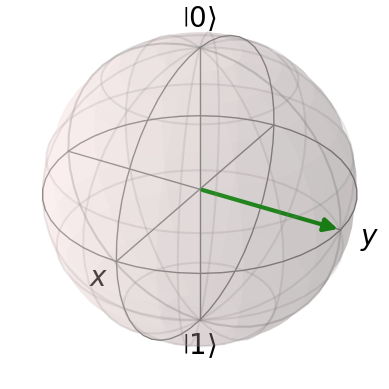

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

def plotKetBloch(ket):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection="3d")
    sphere=Bloch(axes=ax)
    sphere.add_states(ket)
    sphere.show()

##Rentrer les amplitudes sous la forme x+yj :
amplitudeEtat0=1+0j
amplitudeEtat1=0+1j

##Traitement et affichage :
etatTotal=np.array([[amplitudeEtat0],[amplitudeEtat1]])
etatTotal=etatTotal/np.sqrt(np.real(etatTotal[0]*np.conjugate(etatTotal[0])+etatTotal[1]*np.conjugate(etatTotal[1])))
plotKetBloch(Qobj(etatTotal))

Il existe de nombreux systèmes quantiques différents pouvant être utilisés comme unité primaire. Certains ont deux états accessibles, comme les électrons ou les boucles supraconductrices, et sont utilisées en tant que qubits. D'autres systèmes peuvent avoir plus d'états accessibles, on parle alors de qutrits (3 états accessibles, $\ket{0},\ket{1},\ket{2}$) ; de ququarts (4 états accessibles, $\ket{0},\ket{1},\ket{2},\ket{3}$) ; et de qudits (au-delà de 4 états accessibles).

Pour leur compatibilité immédiate avec l'informatique classique et ses algorithmes, les systèmes à qubits ont jusqu'ici été très privilégiés. Nous nous concentrerons donc sur ceux-ci.

<hr style="border:2px solid gray">

## La superposition d'états à l'échelle d'un système de qubits

Lorsque notre système comprend plusieurs qubits, on peut écrire son état sous la forme d'un unique ket (ou vecteur) : $\ket{x_{q1}x_{q2}...x_{qN}}$ , ($x_{qi}$ état du $i^{ème}$ qubit). Le nombre d'états accessibles croît exponentiellement avec la quantité de qubits, en $2^N$. On note les états accessibles en fonction du nombre de qubits :
$$\begin{array}{lcr}
\mbox{1 qubit :} & \ket{0} & \ket{1} \\
\mbox{2 qubits :} & \ket{00} & \ket{01} & \ket{10} & \ket{11} \\
\mbox{3 qubits :} & \ket{000} & \ket{001} & \ket{010} & \ket{011} & \ket{100} & \ket{101} & \ket{110} & \ket{111} \\
...\end{array}$$

On ne réfléchit plus alors à l'échelle des qubits, mais bien à l'échelle du système. À un instant donné, le système se trouvera dans une combinaison linéaire de tous ses différents états accessibles ; une mesure de tous les qubits du système le forcera à choisir l'un de ces états (avec une probabilité dépendant de sa proportion dans la combinaison).

<hr style="border:1px light gray">

Par exemple, prenons un système à deux qubits, une série d'opération nous permet de construire l'état suivant : 
$$\ket{\psi}=\dfrac{1}{2\sqrt{2}}\left(\ket{00}+\ket{01}\right)+\dfrac{\sqrt{3}}{2\sqrt{2}}\left(\ket{10}+\ket{11}\right)$$

Une mesure de l'état des deux qubits nous donnera :
- $\ket{00}$ dans 12,5% des cas
- $\ket{01}$ dans 12,5% des cas
- $\ket{10}$ dans 37,5% des cas
- $\ket{11}$ dans 37,5% des cas

<hr style="border:1px light gray">

En plaçant notre système dans une superposition d'états, il est alors possible de travailler sur eux-tous _à la fois_. Les opérations que nous appliquerons sur notre système s'appliqueront sur toute la superposition d'états.

Dans le cas présent, les qubits sont *indépendants*. Cela signifie que l'on peut écrire l'état du système comme le produit tensoriel de l'état de chacun des qubits :
$$\left(\dfrac{1}{\sqrt{2}}\ket{0}_0+\dfrac{1}{\sqrt{2}}\ket{1}_0\right)\otimes\left(\dfrac{1}{2}\ket{0}_1+\dfrac{\sqrt{3}}{2}\ket{1}_1\right)=\ket{\psi}$$
$$(avec  \ket{x}_0\otimes\ket{y}_1=\ket{xy})$$


Une mesure d'un unique qubit (ou d'un sous-ensemble de qubits) fera s'effondrer la fonction d'onde du système sur tous ses états compatibles avec la mesure réalisée. Par exemple si nous mesurons l'état $\ket{1}_0$ sur le premier qubit, alors la fonction d'onde du système deviendra :
$$\ket{\psi'}=\dfrac{1}{2}\ket{10}+\dfrac{\sqrt{3}}{2}\ket{11}$$

<hr style="border:2px solid gray">

## L'intrication quantique

Il peut arriver que les qubits ne soient pas indépendants. Lorsque c'est le cas, on dit qu'ils sont **intriqués**. Cela signifie que l'état de l'un est directement lié à l'état de l'autre. Il est alors strictement impossible de décrire le système comme une simple juxtaposition de qubits ; il faut le traiter comme un ensemble.

<hr style="border:1px light gray">

Un exemple simple est la superposition d'états suivante :
$$\ket{\psi}=\dfrac{1}{\sqrt{2}}\left(\ket{00}+\ket{11}\right)$$

Dans cette superposition d'état, les deux qubits intriqués ont systématiquement le même état.

On note deux propriétés de ce système intriqué :
- Il est impossible d'écrire le système sous la forme $\ket{\psi}=\left(\alpha\ket{0}_0+\beta\ket{1}_0\right)\otimes\left(m\ket{0}_1+n\ket{1}_1\right)$ ;
- La mesure de l'état de l'un des qubit permet de connaître l'état du système entier : mesurer $\ket{1}_0$ sur le premier qubit impliquera nécessairement que le deuxième qubit soit dans l'état $\ket{1}_1$ sans avoir à le mesurer.

<hr style="border:1px light gray">

De manière plus générale, nous avons :
- que l'état de qubits intriqués ne *peut pas* être décrit par un produit tensoriel des états des qubits individuels ;
- la mesure de l'état de l'un des qubits intriqués fournit une information complète ou partielle de l'état du reste du système.

L'information fournit par la mesure de l'état d'un des qubits peut n'être que partielle en ce qu'elle ne fournit pas nécessairement un état exact dans lequel le système se trouverait. Prenons à titre d'exemple un système à 3 qubits :
$$\ket{\psi}=\dfrac{1}{\sqrt{2}}\ket{000}+\dfrac{1}{2}\left(\ket{101}+\ket{110}\right)$$
Dans ce cas, il est évident que les trois qubits sont bien intriqués : 
- il n'existe aucun état pour lequel la valeur des qubits 1 et 2 soit respectivement $\ket{0}_0$ et $\ket{1}_1$.
- il n'existe aucun état pour lequel la valeur des qubits 1 et 3 soit respectivement $\ket{0}_0$ et $\ket{1}_2$.
- il n'existe aucun état pour lequel la valeur des qubits 2 et 3 soit respectivement $\ket{1}_1$ et $\ket{1}_2$.

Pourtant, une mesure du deuxième qubit ne donnera pas nécessairement l'état du premier et du troisième. Si par exemple nous mesurons l'état $\ket{0}_1$, alors la fonction d'onde du système s'effondrera sur les états compatibles avec cette mesure, on aura alors :
$$\ket{\psi'}=\dfrac{2}{\sqrt{3}}\left(\dfrac{1}{\sqrt{2}}\ket{000}+\dfrac{1}{2}\ket{101}\right)$$
(Le facteur $\dfrac{2}{\sqrt{3}}$ sert à la normalisation de la fonction d'onde)

La mesure de ce deuxième qubit n'a pas donné avec certitude l'état des autres, mais a modifié la probabilité de mesures de leurs différents états individuels.


### À vous de jouer !

Vous allez pouvoir tester l'effet de la mesure de qubits sur un système grâce à un code préfait à trou. Il vous suffit de rentrer :
- l'état initial du système ;
- le(s) qubit(s) à mesurer.

Le programme rendra alors en sortie la nouvelle fonction d'onde normalisée du système (*ie.* le nouvel état normalisé du système).

In [5]:
import sympy as sp
from sympy.physics.quantum.state import *

def buildWaveFunction(tab):
    wavefunction=0
    normalisateur=0
    for el in tab:
        wavefunction+=el[0]*Ket(el[1])
        normalisateur+=el[0]*sp.conjugate(el[0])
    return(wavefunction/sp.sqrt(normalisateur))

def buildCollapsedWaveFunction(tab,qubitMesure,valeurMesure):
    wavefunction=0
    normalisateur=0
    for el in tab:
        test=1
        for i in range(len(qubitMesure)):
            if(int(el[1][qubitMesure[i]])!=valeurMesure[i]):
                test=0
        if(test):
            wavefunction+=el[0]*Ket(el[1])
            normalisateur+=el[0]*sp.conjugate(el[0])
    if(normalisateur!=0):
        return(wavefunction/sp.sqrt(normalisateur))
    else:
        return(0)

##Rentrer une fonction d'onde initiale
# elle doit être sous le format [[amplitude1,'etat1'],...,[amplitudeN,'etatN']]
# pour des amplitudes flottantes, nous conseillons d'utiliser le module sympy : sp
definitionEtatSysteme=[[3,'001'],[4,'010'],[1/sp.sqrt(2),'111']]

##Rentrer le qubit mesuré ainsi que sa valeur mesurée, tout deux au format de liste d'entiers 
qubitMesure=[0,2] #/!\ l'indexation commence à 0
valeurMesure=[0,1] #la valeur doit être soit 0 soit 1

##Traitement et affichage :
print("Fonction d'onde initiale :",buildWaveFunction(definitionEtatSysteme))
if(len(qubitMesure)==1):
    print("\nNous avons mesuré l'état du qubit n°",*qubitMesure,", pour une valeur obtenue de ",*valeurMesure,".",sep='')
else:
    print("\nNous avons mesuré l'état des qubits ",qubitMesure,", pour des valeurs obtenues de respectivement ",valeurMesure,".",sep='')
fonctionFinale=buildCollapsedWaveFunction(definitionEtatSysteme,qubitMesure,valeurMesure)
if(fonctionFinale!=0):
    print("\nLa fonction d'onde du système est alors :",fonctionFinale)
else:
    print("Cette mesure est impossible. La fonction d'onde définie ne le permet pas.")

Fonction d'onde initiale : sqrt(102)*(3*|001> + 4*|010> + sqrt(2)*|111>/2)/51

Nous avons mesuré l'état des qubits [0, 2], pour des valeurs obtenues de respectivement [0, 1].

La fonction d'onde du système est alors : |001>


Mais comment concrètement pouvons nous placer un système dans une superposition d'états donnée ? C'est le rôle des **circuits quantiques**.

<hr style="border:2px solid gray">

## Les circuits quantiques

Les circuits quantiques forment de fait le gros de ce que l'on appelle aujourd'hui l'informatique quantique. 

En voici un exemple :

![circuit_paire_bell.png](QCpy-additionalFiles/illustrations/circ_paire_bell.png)

#### Comment lire un diagramme de circuit quantique ?

1) Un circuit quantique est en fait une suite d'opérations agissant sur un **registre de qubits**. Dans le cas présent, ce registre est composé deux qubits, visibles sur la gauche : Q0 et Q1.

2) La double ligne supplémentaire correspond à un registre de **bits classiques**, permettant de récolter, stocker ou exploiter des données classiquement. C'est notamment ici que l'on pourra stocker le résultat de la mesure d'un qubit.

3) Le diagramme se lit de gauche à droite. Au fur et à mesure de l'avancée dans le circuit, les qubits subissent des **portes quantiques** qui vont modifier leur état. Une porte quantique peut s'appliquer sur un ou plusieurs qubits.

<div class="alert alert-block alert-warning">
<b>Attention :</b> le diagramme est en fait une représentation <i>temporelle</i> et non spatiale (comme l'on aurait en informatique classique). Dans les ordinateurs quantiques, les qubits sont des éléments pris immobiles sur lesquels on opère des actions qui modifient leur état (par l'application d'un champ magnétique, d'un champ électrique... en fonction du système).
</div>

4) L'**état initial** de chaque qubit est $\ket{0}_x$ (sauf dans certains systèmes physiques précis). À partir de cet état initial non intriqué, le développeur d'algorithme quantique construit lui même une superposition à partir d'opérations.

5) Pour terminer, les qubits sont **mesurés** (valeurs stockées sur les bits classiques C0 et C1), le système choisit alors un état. Il s'agit du résultat exploitable de l'ordinateur quantique.

#### Les clés de base pour le développeur d'algorithmes quantiques

Nous donnons les éléments clés permettant au développeur d'algorithmes quantiques de construire ses circuits :
- Toutes les portes quantiques sont traduisibles en **matrices** unitaires s'appliquant sur les **vecteurs d'état** du système ;
- Toutes les portes quantiques à N qubits sont traduisibles en des familles primitives de portes à 1 ou 2 qubits - quasi-universelles à tous les systèmes physiques.

Une __[liste de ces portes primitives](./QCpy-additionalFiles/available_gates.ipynb)__ est proposée par défaut dans la bibliothèque myqlm (pour écrire, simuler, optimiser et exécuter des programmes quantiques par le biais d'une interface Python). Les 4 colonnes vous donnent :
- le nom commun de la porte ;
- son appellation dans le langage de la librairie myqlm ;
- le nombre de qubits qu'elle affecte ;
- sa représentation matricielle.

### À vous de jouer !

Vous allez pouvoir construire votre premier circuit quantique ! Pour ce faire, il vous suffira de remplir le code à trou suivant.
Vous devrez :
- donner l'état initial du qubit - bien que celui-ci soit usuellement fixé à $\ket{0}$, nous donnons une liberté supplémentaire pour le bien de l'apprentissage ;
- donner la suite de portes quantiques à lui appliquer.

Seront alors affichés :
- le circuit quantique appliqué, précédé d'une porte quelconque "Initialisation" plaçant le qubit dans l'état initial précisé ;
- les représentations matricielles des kets initiaux et finaux (tous deux normalisés), et la matrice du circuit quantique complet ;
- l'état initial du qubit sur la sphère de Bloch ;
- l'état final du qubit sur la sphère de Bloch.

<div class="alert alert-block alert-info">
<b>Remarque :</b> seules des portes à 1 qubit peuvent être utilisées.
</div>

Nous affichons ici en quatre temps :
- le circuit quantique appliqué, précédé d'une porte quelconque "Initialisation" plaçant le qubit dans l'état initial précisé ;
- les représentations matricielles des kets initiaux et finaux (tous deux normalisés), et la matrice du circuit quantique complet ;
- l'état initial du qubit sur la sphère de Bloch ;
- l'état final du qubit sur la sphère de Bloch.


Etat initial :
 [[1.+0.j]
 [0.+0.j]] 

Matrice du circuit quantique :
 [[0.76817776+0.31818965j 0.21260752-0.51327997j]
 [0.30865828-0.46193977j 0.69134172+0.46193977j]] 

Etat final :
 [[0.76817776+0.31818965j]
 [0.30865828-0.46193977j]]

Nous affichons ensuite l'état initial et l'état final sur la sphère de Bloch



<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

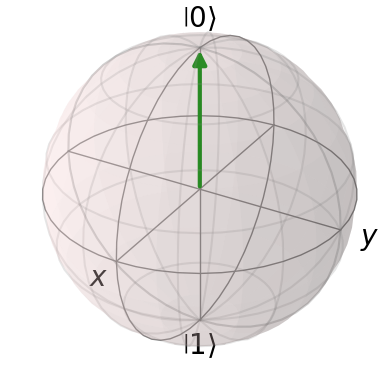

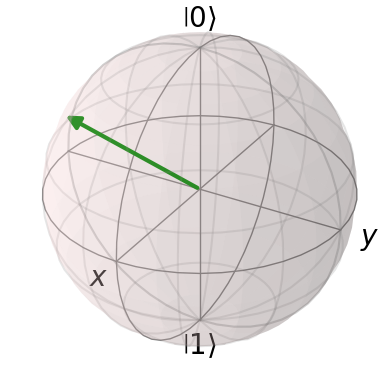

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from qutip.qip.circuit import QubitCircuit, Gate
from qutip.qip.operations import gate_sequence_product

def buildQC(*gates):
    arg=gates[0]
    qc = QubitCircuit(N=1)
    typ=type((1,1))
    for x in arg:
        if(type(x)==typ):
            y=(convertSyntax_myQLM_to_quTiP(x[0]),x[1])
        else:
            y=convertSyntax_myQLM_to_quTiP(x)
        if(type(y)==typ):
            qc.add_gate(y[0],targets=0,arg_value=y[1])
        else:
            qc.add_gate(y,targets=0)
    return(gate_sequence_product(qc.propagators()).full())

from qat.lang import Program,X,Y,Z,RX,RY,RZ,T,S,PH,H,I
from qat.lang.AQASM import *

GateInit = AbstractGate("Initialisation",[])

def afficheCircuitmyQLM(*arg):
    gates=arg[0]
    prog=Program()
    qreg=prog.qalloc(1)
    typ=type((1,1))
    prog.apply(GateInit(),qreg)
    for x in gates:
        if(type(x)==typ):
            prog.apply(eval(x[0])(x[1]),qreg)
        else:
            prog.apply(eval(x[0]),qreg)
    prog.to_circ().display()

def convertSyntax_myQLM_to_quTiP(gateName):
    match gateName:
        case "H":
            return("SNOT")
        case "X":
            return(("RX",np.pi))
        case "Y":
            return(("RY",np.pi))
        case "Z":
            return(("RZ",np.pi))
        case "PH":
            return("PHASEGATE")
        case "S":
            return(("PHASEGATE",np.pi/2))
        case "T":
            return(("PHASEGATE",np.pi/4))
    return(gateName)

def plotKetBloch(ket):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection="3d")
    sphere=Bloch(axes=ax)
    sphere.add_states(ket)
    sphere.show()

def boiteNoire(gates,amplitudeEtat0=1,amplitudeEtat1=0):
    etatInitial=np.array([[amplitudeEtat0],[amplitudeEtat1]])
    print("Nous affichons ici en quatre temps :")
    print("- le circuit quantique appliqué, précédé d'une porte quelconque \"Initialisation\" plaçant le qubit dans l'état initial précisé ;")
    print("- les représentations matricielles des kets initiaux et finaux (tous deux normalisés), et la matrice du circuit quantique complet ;")
    print("- l'état initial du qubit sur la sphère de Bloch ;")
    print("- l'état final du qubit sur la sphère de Bloch.")
    QCmatrix=buildQC(gates)
    etatInitial=etatInitial/np.sqrt(np.real(etatInitial[0]*np.conjugate(etatInitial[0])+etatInitial[1]*np.conjugate(etatInitial[1])))
    etatFinal=np.dot(QCmatrix,etatInitial)
    afficheCircuitmyQLM(gates)
    print("Etat initial :\n",etatInitial,"\n\nMatrice du circuit quantique :\n",QCmatrix,"\n\nEtat final :\n",etatFinal)
    print("\nNous affichons ensuite l'état initial et l'état final sur la sphère de Bloch\n")
    spinInit=Qobj(etatInitial)
    spinFinal=Qobj(etatFinal)
    plotKetBloch(spinInit)
    plotKetBloch(spinFinal)

##Definition de l'état initial :
amplitudeEtat0=1+0j
amplitudeEtat1=0+0j
##Definition du circuit quantique :
# Celui-ci est définit comme un tuple de string et de tuples (string,float) pour les portes demandant des arguments
# Le format final est donc : ("gate1",("gate2",argument),"gate3",...,"gateN")
circuitQuantique=("H","T","H",("RX",np.pi/8),("PH",np.pi/16))
#Boîte noire pour le traitement et l'affichage des données et résultats :
boiteNoire(gates=circuitQuantique,amplitudeEtat0=amplitudeEtat0,amplitudeEtat1=amplitudeEtat1)

Les lecteurs les plus attentifs auront remarqués que ce programme se sert conjointement de deux librairies différentes :
- QuTiP : pour le calcul des matrices de circuits quantiques et l'affichage des sphères de Bloch ;
- myQLM : pour l'affichage des circuits quantiques.

Ces deux librairies ne sont pas conçues pour travailler ensemble, ce qui a demandé un travail supplémentaire en code. Cependant, nous avons montré qu'à leur manière, chacune permet d'aborder les circuits quantiques.

Par la suite dans ce jupyter notebook, et dans le module QCpy, nous nous servirons de myqlm.

#### Comment prévoir le résultat d'un circuit quantique ?

Pour prévoir le résultat d'un circuit quantique, il suffit de prendre une à une toutes les opérations agissant sur celui-ci et de calculer en conséquence l'évolution de la superposition d'états du système. Lorsqu'une mesure ou un phénomène extérieur rentre en jeu, il faut prendre en compte tous les cas possibles.

Pour illustrer cette méthode, reprenons notre exemple précédent :

![circuit_paire_bell.png](QCpy-additionalFiles/illustrations/circ_paire_bell.png)

Prenons étape par étape l'état du système :
1) initialement nous avons $\ket{\psi}=\ket{00}$
2) la porte de Hadamard (H) a pour effet de transformer l'état d'un qubit donné : $\ket{0}\Rightarrow\dfrac{1}{\sqrt{2}}\left(\ket{0}+\ket{1}\right)$

   cela donne donc sur notre système : $\ket{\psi}=\dfrac{1}{\sqrt{2}}\left(\ket{00}+\ket{10}\right)$
3) la porte CNOT consiste à appliquer une porte X (rotation autour de l'axe X à 180°) sur un qubit (marqué du cercle barré) en fonction de l'état d'un autre qubit (marqué du point noir). Si l'état du qubit de contrôle est $\ket{0}$, rien n'est fait ; si l'état est $\ket{1}$, alors l'opération s'appliquer.

   L'état devient alors : $\ket{\psi}=\dfrac{1}{\sqrt{2}}\left(\ket{00}+\ket{11}\right)$

<div class="alert alert-block alert-success">
<b>Remarque :</b> on retrouve bien là un exemple typique d'intrication entre deux qubits !
</div>

4) finalement, on mesure l'état de nos deux qubits. On a alors deux cas possibles : soit 1 et 1, soit 0 et 0 ; à probabilités égales.

Via la librairie myqlm, nous pouvons reconstruire ce circuit, et retrouver le même résultat :

In [7]:
prog=Program() #on instancie un objet de la classe Program
qbits=prog.qalloc(2) #on alloue la mémoire pour 2 qbits
H(qbits[0]) #on travaille sur un tableau de qbits au lieu des indices directement
CNOT(qbits[0],qbits[1])
prog.measure(qbits)

circ=prog.to_circ() #on compile le programme dans un circuit pour pouvoir ensuite s'en servir
circ.display() #on affiche le circuit en question

In [8]:
from qat.qpus import PyLinalg
##on lance N fois la mesure de l'état du système :
N=10
qpu=PyLinalg()
for i in range(N):
    results=qpu.submit(circ.to_job(nbshots=1))
    print("Mesure n°"+str(i+1),":",results[0].state)

Mesure n°1 : |11>
Mesure n°2 : |11>
Mesure n°3 : |00>
Mesure n°4 : |11>
Mesure n°5 : |11>
Mesure n°6 : |11>
Mesure n°7 : |00>
Mesure n°8 : |00>
Mesure n°9 : |00>
Mesure n°10 : |00>


/home/matthieu/Python3/TipQLM/lib/python3.11/site-packages/qat/pylinalg/service.py:172: FutureWarning: Option aggregate_data of your job is True, discarding intermediate measures
  result = aggregate_data(result)


## Conclusion

Dans ce jupyter notebook introductif, nous avons appris les fondamentaux de l'informatique quantique. 

Il existe de nombreux points que nous n'avons pas abordé : détail des technologies hardware ; alternatives à la programmation en portes (quantum annealing...) ; applications concrètes... Mais vous possédez maintenant les clés de compréhension pour vous permettre d'explorer cette nouvelle discipline.